In [1]:
!scrapy crawl profiles
# only leetcode.com (should manually add LC-CN users)

In [2]:
from collections import defaultdict
from datetime import date, timedelta
import pandas as pd
import glob
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

In [26]:
today = date.today().strftime("%Y-%m-%d")
# last_date = (date.today() - timedelta(weeks=1)).strftime("%Y-%m-%d")
last_date = '2020-09-06'
data = pd.read_csv("hidden/solved-%s.csv" % today )

In [27]:
data.sort_values(by='solved', inplace=True)

In [28]:
total_solved = data['solved'].sum()

In [29]:
def format_pct(x, data):
    return int(round(x * total_solved / 100))

In [30]:
filter_list = [
    '策马奔腾的6希😏', 
]

In [56]:
def format_name(name):
    if len(name) < 12: 
        return name
    return name[:9] + '...'

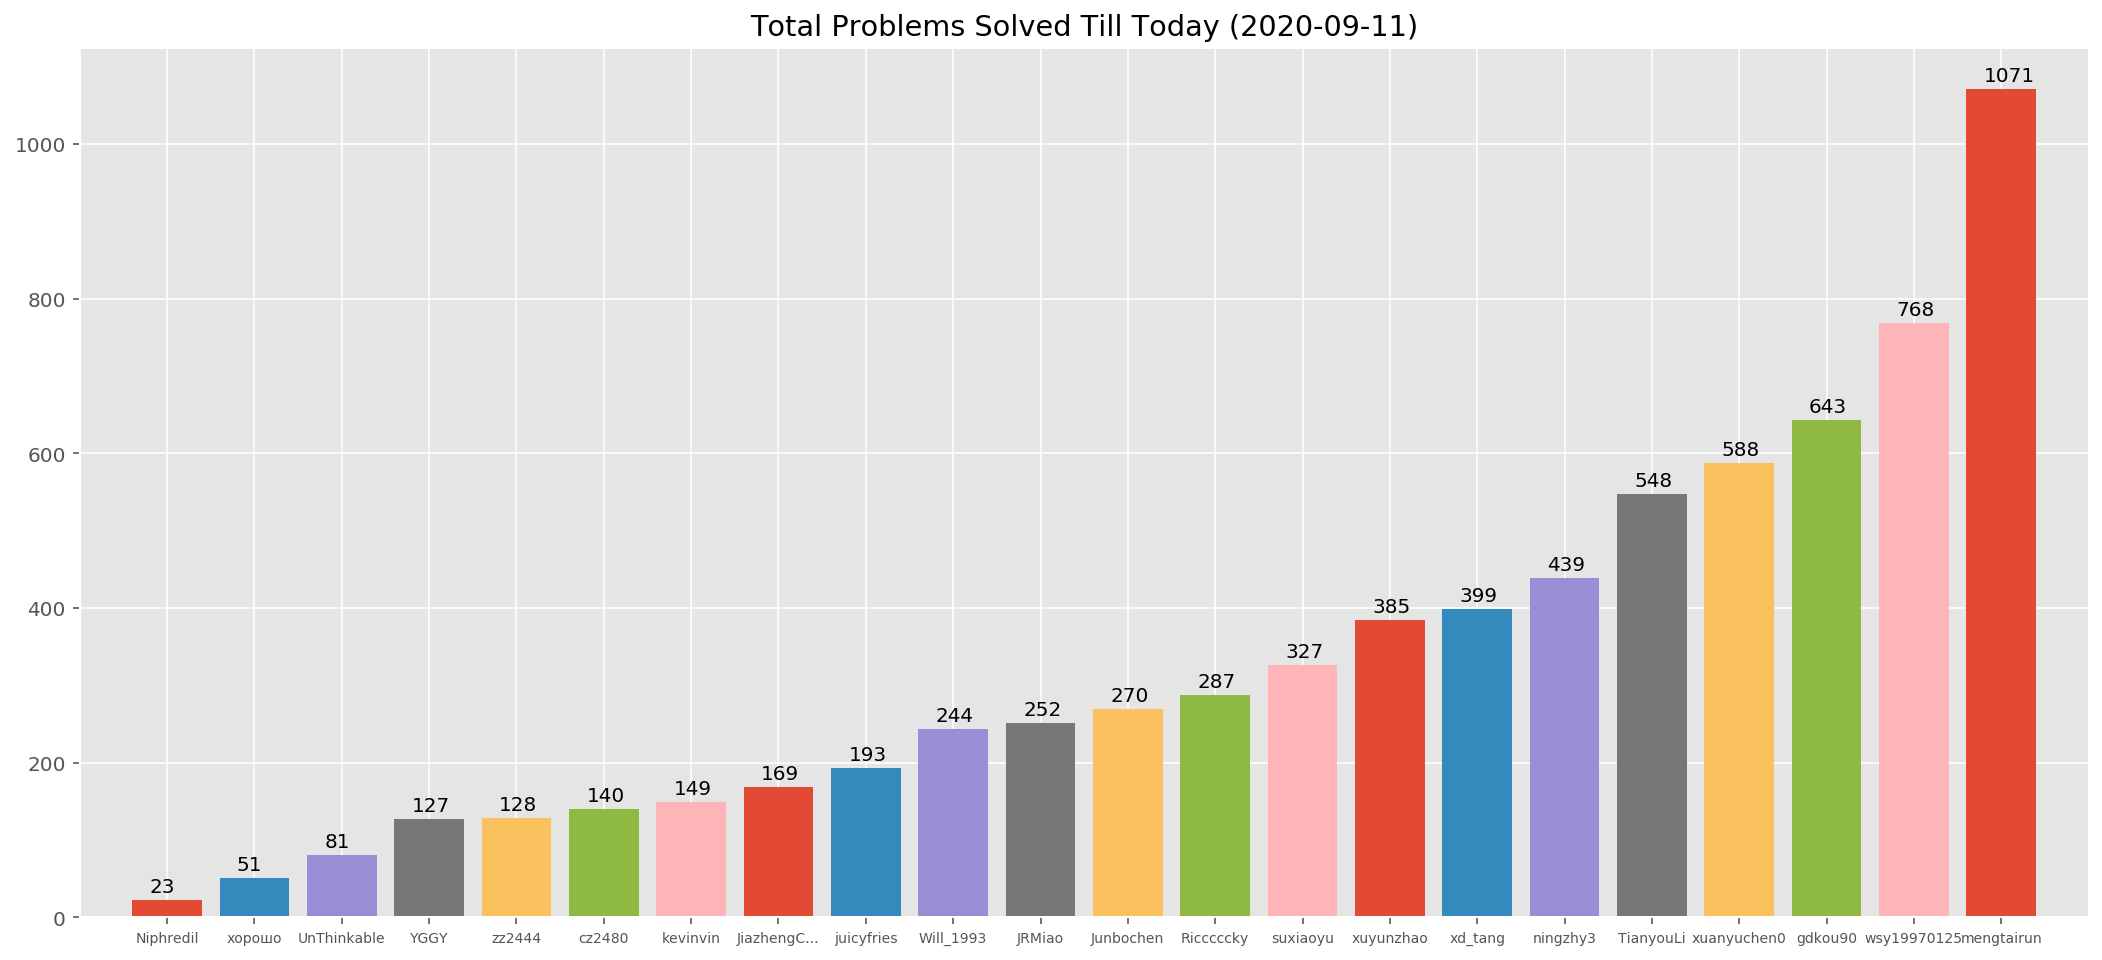

In [57]:
plt.figure(figsize=(18, 8));
plt.title('Total Problems Solved Till Today (%s)' %today)

for i, name in enumerate(data.name.unique()):
    if name in filter_list: continue
    v = int(data.query('name=="%s"' %name)['solved'])
    plt.bar(format_name(name), v)
    plt.text(i-0.2, v+10, v)
    plt.xlim(-1, len(data.name.unique()))

plt.xticks(fontsize=7)
plt.show();

In [32]:
df_last = pd.read_csv("hidden/solved-%s.csv" % last_date )
df2w = df_last.merge(data, on='name')
df2w['new'] = df2w['solved_y'] - df2w['solved_x']

In [33]:
df2w.sort_values(by='new', inplace=True)

In [59]:
df2w_has_new = df2w.query('new > 0')

In [60]:
total_new = sum(df2w_has_new['new'])

### Bar plot of last week data

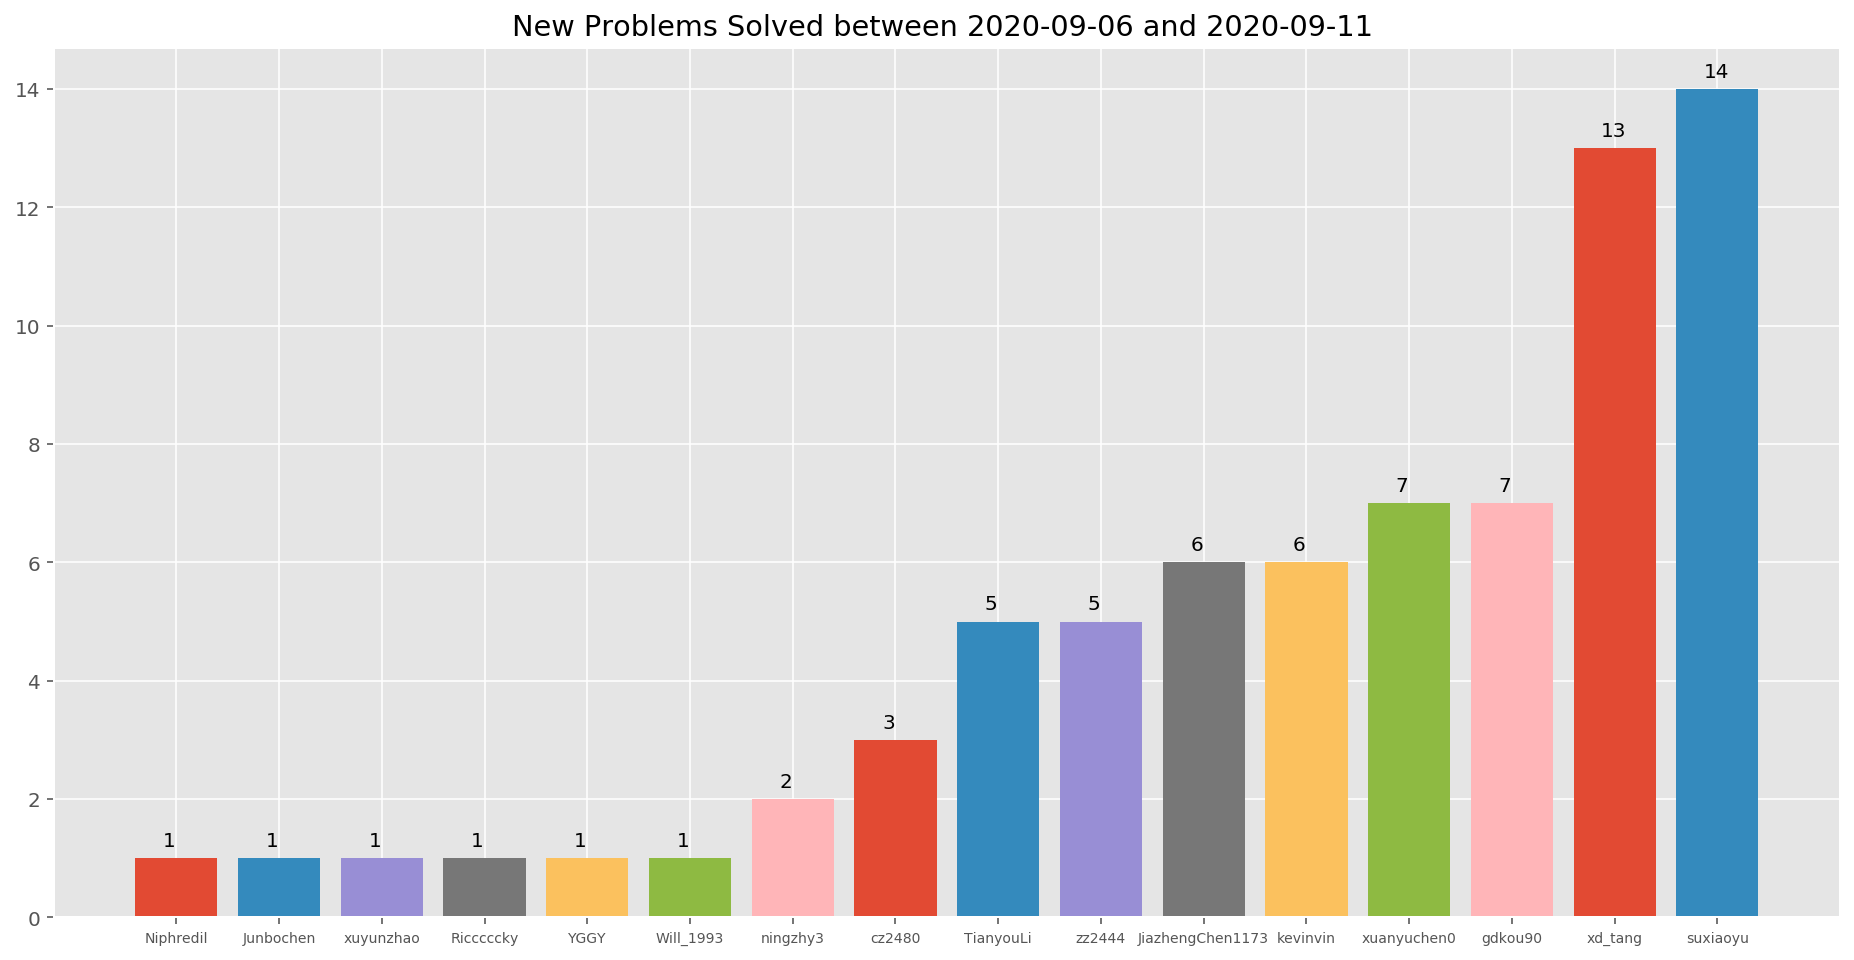

In [61]:
plt.figure(figsize=(16, 8));
plt.title('New Problems Solved between %s and %s ' % (last_date, today))
for i, name in enumerate(df2w_has_new.name.unique()):
    if name in filter_list: continue
    v = int(df2w_has_new.query('name=="%s"' %name)['new'])
    plt.bar(name, v)
    plt.text(i-0.13, v+0.2, v)
plt.xticks(fontsize=7)
plt.show();

## Plot historical trend data

In [37]:
files = glob.glob('hidden/solved-*.csv')

In [38]:
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [39]:
df.sort_values(by=['date', 'solved'], inplace=True)

In [40]:
offsets = defaultdict(int)

In [71]:
def formate_date(date):
    return '-'.join(date.split('-')[1:])

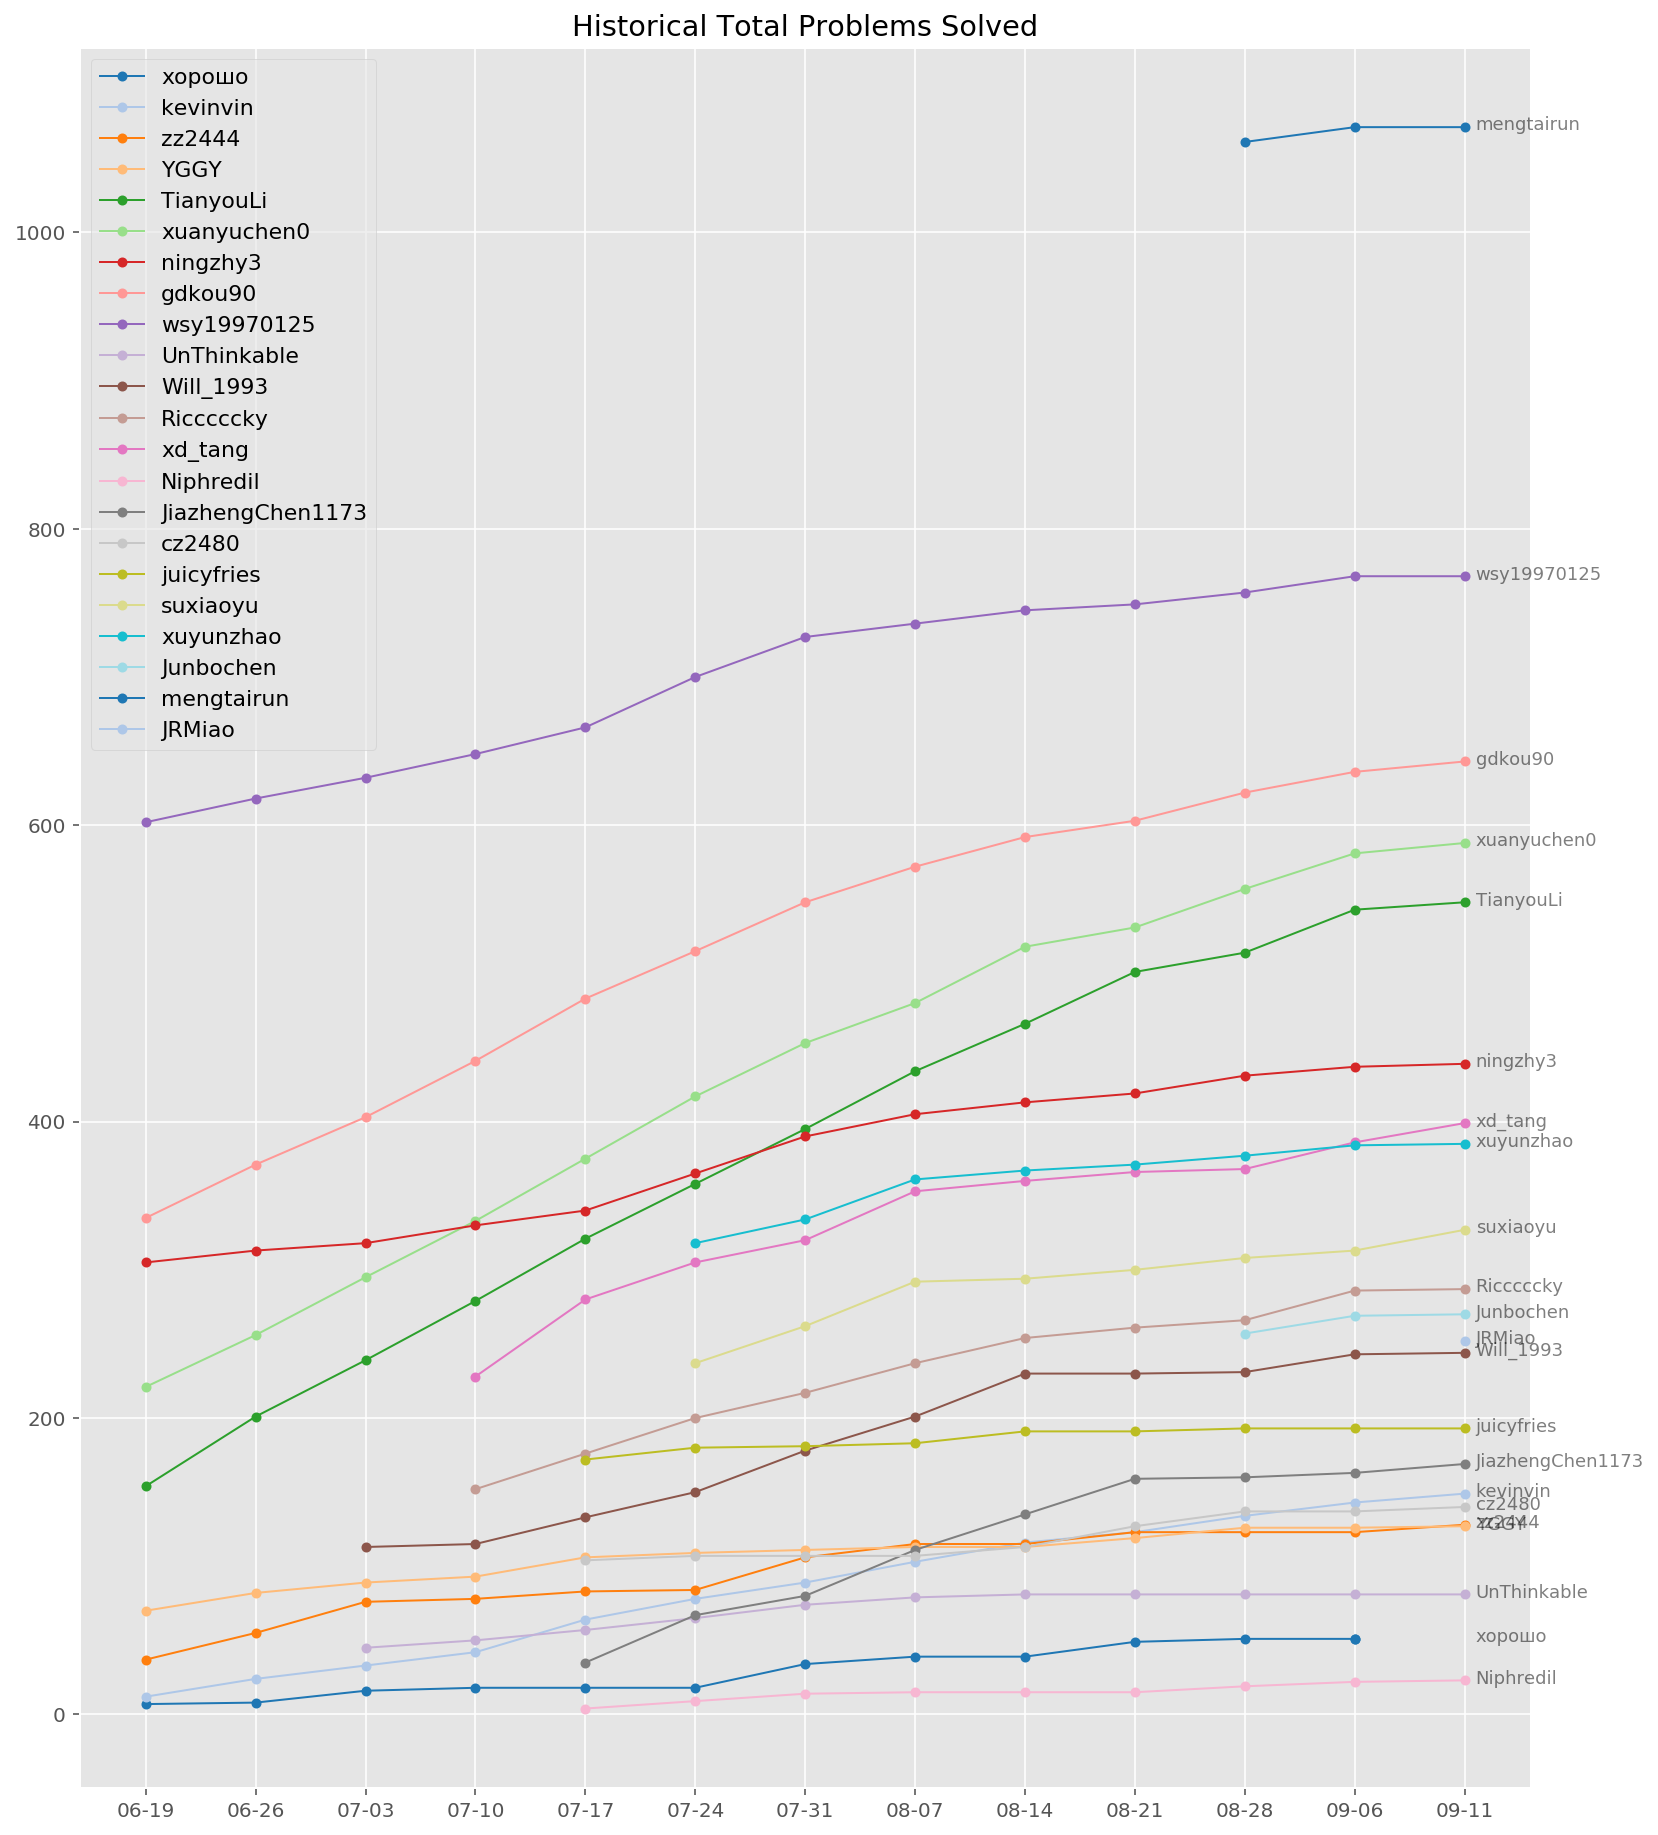

In [74]:
plt.style.use('ggplot')
with plt.style.context({"axes.prop_cycle" : plt.cycler("color", plt.cm.tab20.colors)}):
    plt.figure(figsize=(13, 16));
    plt.title('Historical Total Problems Solved')
    for name in df.name.unique():
        if name in filter_list: continue
#         if name not in df2w_has_new.name.unique() and not (name in data and name not in df2w): continue
        queried = df.query('name=="%s"' %name)
        plt.plot(list(map(formate_date, sorted(queried['date']))), sorted(queried['solved']), label=name, marker='o',linewidth=1, markersize=4);
        plt.text(len(files) - 0.9, max(queried['solved'])-2 + offsets[name], name, {'color': 'k', 'fontsize': 9, 'alpha': 0.5})
        plt.legend(loc='upper left', prop={"size":11}, framealpha=0.6);
    plt.show();